<a href="https://colab.research.google.com/github/saimathura/deeplearning-MDSC302/blob/main/22233_Assignment_FineTuning_VGG16_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing CIFAR-10 Datasets

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:

train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=data_transforms['train']
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=data_transforms['val']
)

100%|██████████| 170498071/170498071 [00:04<00:00, 36405368.68it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:

# class Kmnist(Dataset):
#     def __init__(self, df, transform=None, target_transform=None):
#         self.img_labels = df.iloc[:,0]
#         # self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join( self.img_labels.iloc[idx, 0])
#         image = read_image(df.drop(df.columns[0],axis=1).iloc[idx,:].values)
#         label = self.img_labels.iloc[idx, 0]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

In [ ]:
import numpy as np

<ipython-input-9-3d0993717c63>:28: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  plt.imshow(img.T, cmap="gray")


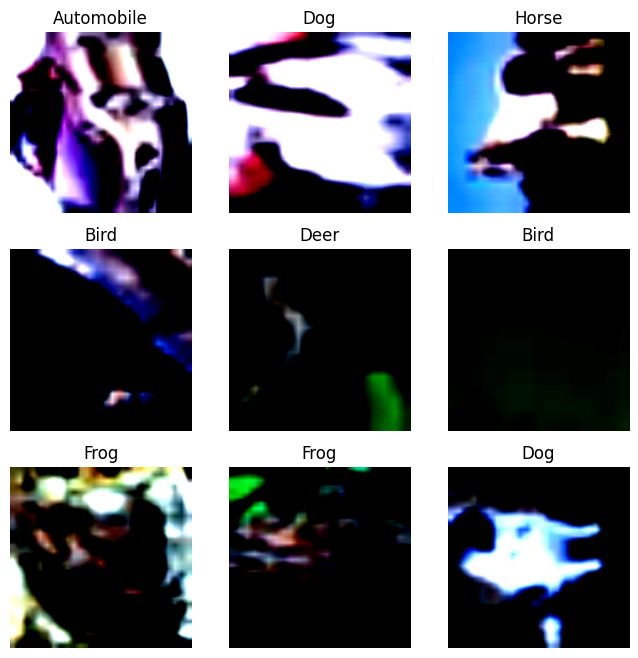

In [ ]:
#Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck.
labels_map = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    inp = img
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.T, cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import random_split

In [ ]:
train_size = int(0.9 * (len(train_data)))

In [ ]:
val_size = len(train_data) - train_size

In [ ]:
train_set , val_set = random_split(train_data, [train_size, val_size])

In [ ]:
train_set.__len__()

45000

In [ ]:
val_set.__len__()


5000

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(train_set,batch_size = 64,shuffle = True)
val_dataloader = DataLoader(val_set,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size = 64,shuffle = True)

In [ ]:
train_features,train_labels = next(iter(train_dataloader))

In [ ]:
train_features.shape

torch.Size([64, 3, 224, 224])

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


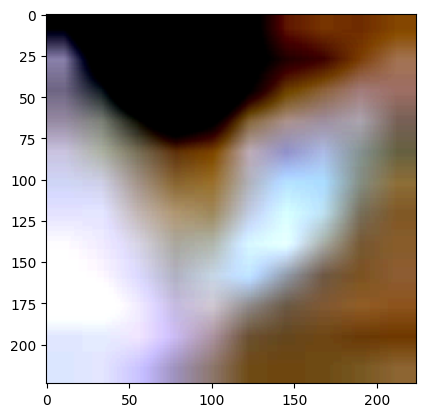

Label: Cat


In [ ]:
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0]
plt.imshow(img.T, cmap="gray",)
plt.show()
print(f"Label: {labels_map[label.item()]}")

In [ ]:
from torch import nn

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
import torch.nn.functional as F

# using optimzer as Adam and the same  neural network from previous

In [ ]:
epochs = 10  # You can adjust the number of epochs as needed

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16_bn', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:02<00:00, 249MB/s]


In [ ]:
model.classifier = nn.Sequential(
   nn.Linear(in_features=25088, out_features=4096, bias=True),
   nn.ReLU(inplace=True),
   nn.Dropout(p=0.5, inplace=False),
   nn.Linear(in_features=4096, out_features=4096, bias=True),
   nn.ReLU(inplace=True),
   nn.Dropout(p=0.5, inplace=False),
   nn.Linear(in_features=4096, out_features=1000, bias=True),
   nn.Dropout(p=0.5, inplace=False),
   nn.Linear(in_features=1000, out_features=10, bias=True),

)

In [ ]:
#model = net()# loading THe Model

In [ ]:
model.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
device = torch.device("cuda:0")
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

# using optimzer as Adam and the same  neural network from previous

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [ ]:
epochs = 5  # You can adjust the number of epochs as needed

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []# for plotting

In [ ]:
from tqdm.auto import tqdm
for e in tqdm(range(epochs)):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
    model.train()  # Set the model to training mode

    # Training loop
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        images = F.softmax(images,dim = 1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for val_images, val_labels in val_dataloader:  # Assuming you have a DataLoader named 'val_loader'
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_images = F.softmax(val_images,dim = 1)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    # Calculate average losses for this epoch
    average_train_loss = train_loss / len(train_dataloader)
    average_val_loss = val_loss / len(val_dataloader)
    train_accuracy = train_correct / train_total * 100
    val_accuracy = val_correct / val_total * 100
    average_train_accuracy = train_accuracy / len(train_dataloader)
    average_val_accuracy = val_accuracy / len(val_dataloader)

    train_losses.append(average_train_loss)
    val_losses.append(average_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{e+1}/{epochs}],Train Accuracy: {average_train_accuracy:.4f}, Val Accuracy: {average_val_accuracy:.4f}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

print("Training finished")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [1/5],Train Accuracy: 0.0628, Val Accuracy: 0.7159, Train Loss: 1.5330, Val Loss: 1.2492
Epoch [2/5],Train Accuracy: 0.0830, Val Accuracy: 0.7686, Train Loss: 1.1968, Val Loss: 1.1159
Epoch [3/5],Train Accuracy: 0.0884, Val Accuracy: 0.8104, Train Loss: 1.0881, Val Loss: 1.0463
Epoch [4/5],Train Accuracy: 0.0919, Val Accuracy: 0.8344, Train Loss: 1.0210, Val Loss: 0.9720
Epoch [5/5],Train Accuracy: 0.0937, Val Accuracy: 0.8557, Train Loss: 0.9743, Val Loss: 0.9280
Training finished


#adding batch Normaliation and plotting that models curves

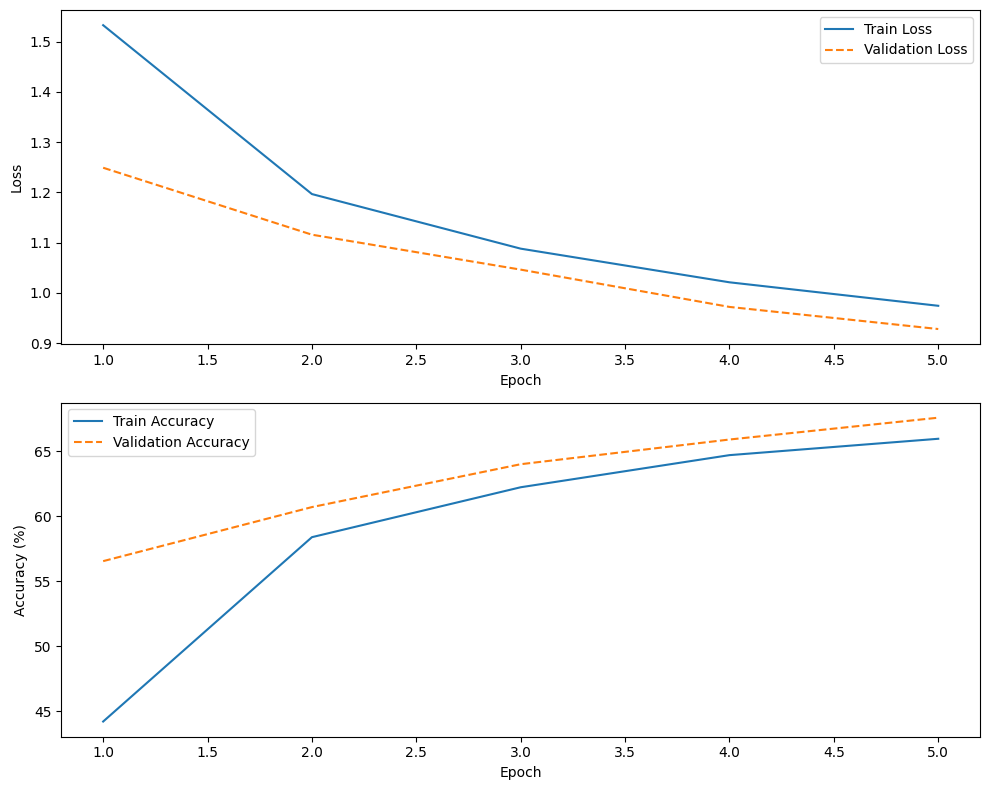

In [ ]:
# Plotting the loss and accuracy curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(range(1, epochs+1), train_losses, label='Train Loss')
ax1.plot(range(1, epochs+1), val_losses, label='Validation Loss', linestyle='dashed')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
ax2.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy', linestyle='dashed')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.tight_layout()
plt.show()

# lets test the Model

In [ ]:

model.eval()  # Set the model to evaluation mode
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for test_images, test_labels in test_dataloader:  # Assuming you have a DataLoader named 'test_loader'
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        test_loss += criterion(test_outputs, test_labels).item()
        _, test_predicted = torch.max(test_outputs, 1)
        test_total += test_labels.size(0)
        test_correct += (test_predicted == test_labels).sum().item()

average_test_loss = test_loss / len(test_dataloader)
test_accuracy = test_correct / test_total * 100

print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 2.3018, Test Accuracy: 14.66%
